<a href="https://colab.research.google.com/github/zeynebgh/CKPT1/blob/main/checkpoint4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
df = pd.read_csv("/kc_house_data.csv")
df.head()
df.isnull().sum().sum()

0

In [16]:
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


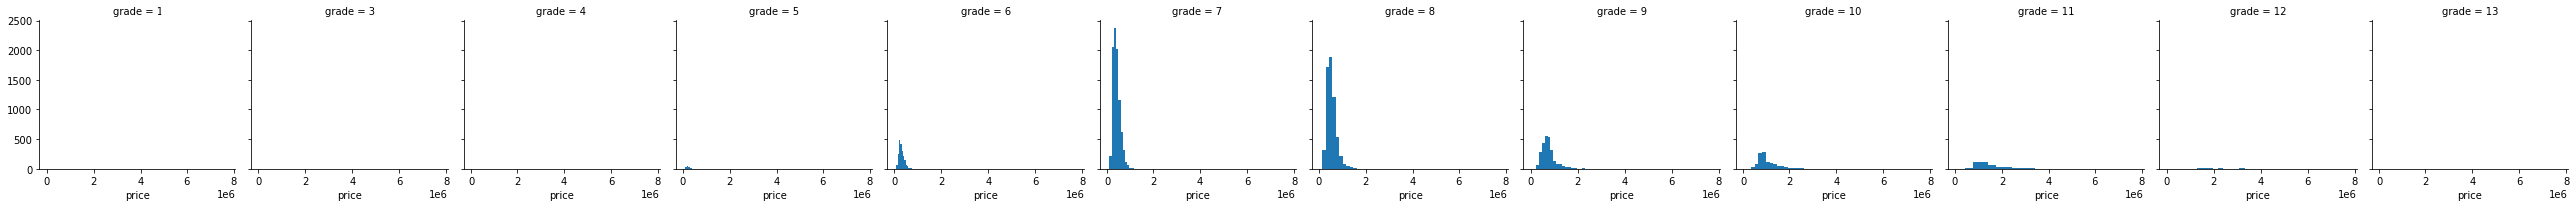

In [18]:
g=sns.FacetGrid(df,col="grade")
g.map(plt.hist,'price',bins=20)
g

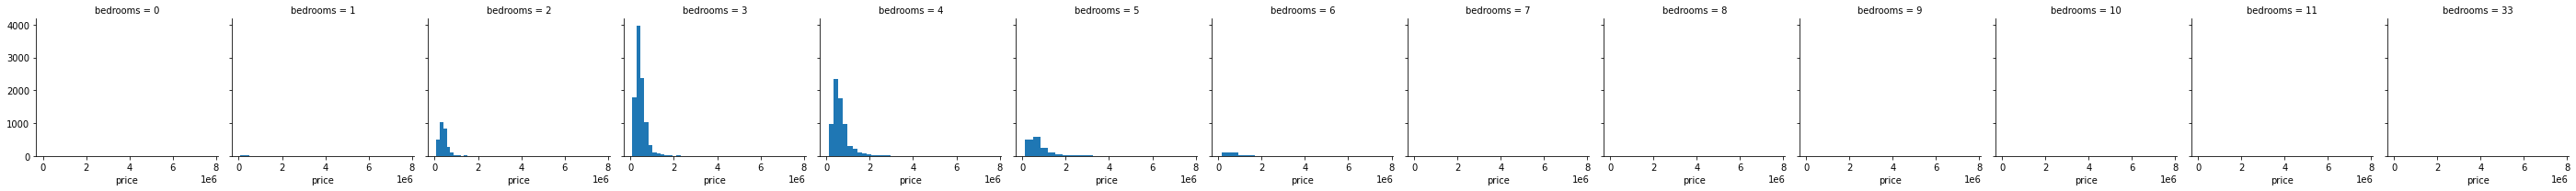

In [19]:
g=sns.FacetGrid(df,col="bedrooms")
g.map(plt.hist,'price',bins=20)
g

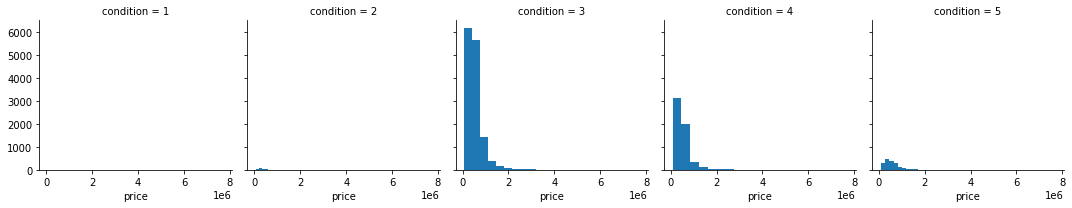

In [20]:
g=sns.FacetGrid(df,col="condition")
g.map(plt.hist,'price',bins=20)
g

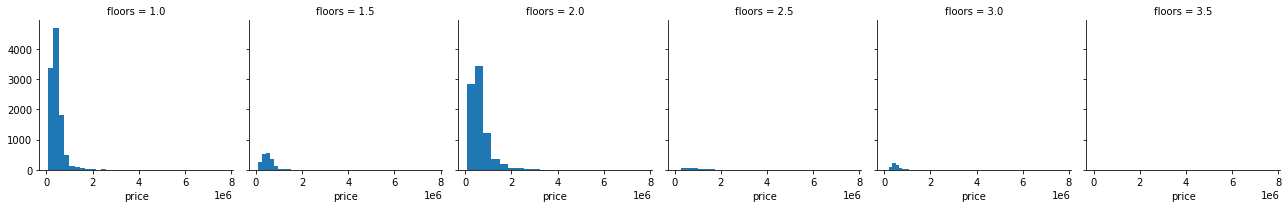

In [21]:
g=sns.FacetGrid(df,col="floors")
g.map(plt.hist,'price',bins=20)
g

In [29]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 24 , 20) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9}, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

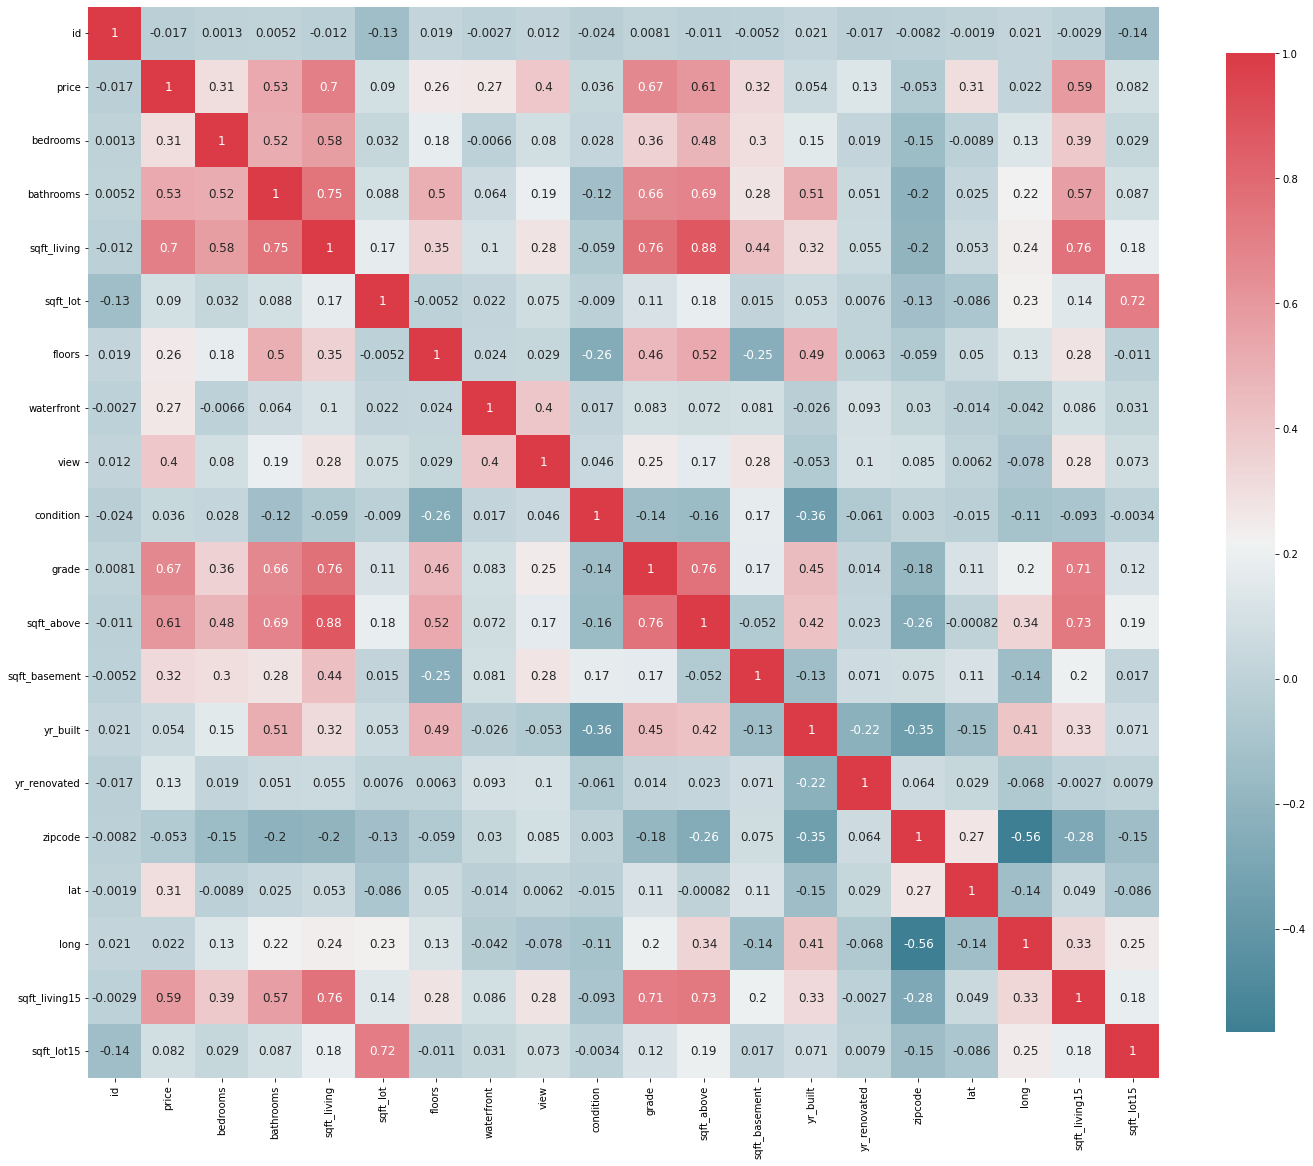

In [30]:
plot_correlation_map(df)

la plus forte correlation est entre:sqft_living et price de valeur 0.88

In [39]:
x= df["sqft_living"].values.reshape(-1, 1)
y= df["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()

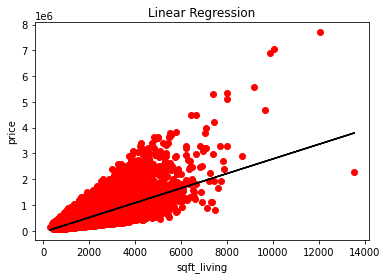

In [40]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
lg.fit(x_train,y_train)
plt.plot(x,lg.predict(x),color="k")
plt.show()

In [41]:
predicted=lg.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


In [51]:
x= df[["sqft_living","grade"]].values#.reshape(-1, 1)
y= df["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
lg.fit(x_train,y_train)
predicted=lg.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57413775762.864265
R squared 0.5433112989852686


poly = PolynomialFeatures(degree = 2) 

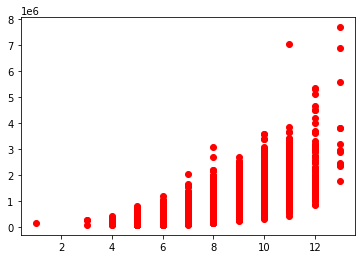

In [49]:
x= df["grade"].values.reshape(-1, 1)
y= df["price"].values
plt.scatter(x,y,color="r")

le graphe de grade en fonction de price semble à une parabole f(x)=x^2
d'ou c'est un polynome de second degrée

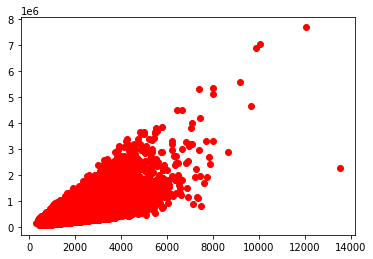

In [50]:
x= df["sqft_living"].values.reshape(-1, 1)
y= df["price"].values
plt.scatter(x,y,color="r")

le graphe de sqft_living en fonction de price semble à une droite lineaire
 f(x)=ax
  d'ou c'est un polynome de premier degrée

la fonction : f(grade,sqft_living) est un polynome de 3ème degré

In [53]:
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  50395734947.953125
R squared:  0.5991351827282221


la regression polynomiale est la meilleure car elle a la plus petite valeur de MSE(qui présente l'erreur) et la plus grand valeur de  r^2 (qui présente la qualité de prédiction)